# 10数据聚合与分组运算
以一种自然的方式对数据进行切片、切块和摘要等操作。
SQL语言可以方便的对数据进行连接、过滤、转换和聚合。
但是SQL语言的分组运算能力有限。
python和pandas可以执行复杂的多的分组运算。
* 计算分组摘要统计，如计数、平均值、标准差，或自定义函数。
* 计算分组的概述统计，比如数量、平均值或标准差，自定义函数。
* 应用组内转换或其他运算，如规格化、线性回归、排名或选取子集等。
* 计算透视表或交叉表。
* 执行分位数分析以及其他统计分组分析。

## 10.1GroupBy机制
拆分->函数计算->合并
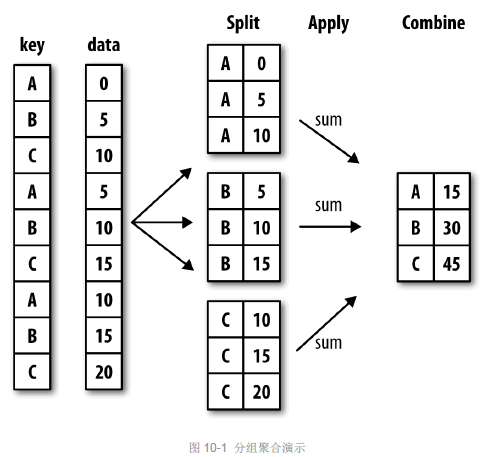




In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.441304,0.948990
1,a,two,0.794921,0.618840
2,b,one,-1.765727,0.862695
3,b,two,0.790995,-0.787394
4,a,one,-0.653425,1.626164


In [10]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [11]:
grouped.mean()

key1
a   -0.433270
b   -0.487366
Name: data1, dtype: float64

In [12]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one    -1.047365
      two     0.794921
b     one    -1.765727
      two     0.790995
Name: data1, dtype: float64

In [13]:
means.unstack()

key2,one,two
key1,,
a,-1.047365,0.794921
b,-1.765727,0.790995


* 对Series进行分组

In [14]:
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])

In [15]:
df['data1'].groupby([states,years]).mean()

California  2005    0.794921
            2006   -1.765727
Ohio        2005   -0.325155
            2006   -0.653425
Name: data1, dtype: float64

### 10.1.1 对分组进行迭代

In [16]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.441304  0.948990
1    a  two  0.794921  0.618840
4    a  one -0.653425  1.626164
b
  key1 key2     data1     data2
2    b  one -1.765727  0.862695
3    b  two  0.790995 -0.787394


In [17]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.441304  0.948990
4    a  one -0.653425  1.626164
('a', 'two')
  key1 key2     data1    data2
1    a  two  0.794921  0.61884
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.765727  0.862695
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.790995 -0.787394


In [18]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.765727,0.862695
3,b,two,0.790995,-0.787394


In [19]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

### 10.1.2选取一列或列的子集

In [20]:
df

,key1,key2,data1,data2
0,a,one,-1.441304,0.948990
1,a,two,0.794921,0.618840
2,b,one,-1.765727,0.862695
3,b,two,0.790995,-0.787394
4,a,one,-0.653425,1.626164


In [21]:
df.groupby('key1')['data1']

In [22]:
df.groupby('key1')[['data1']]

In [23]:
df.groupby(['key1','key2'])['data2'].mean()

key1  key2
a     one     1.287577
      two     0.618840
b     one     0.862695
      two    -0.787394
Name: data2, dtype: float64

### 10.1.3通过字典或Series进行分组

In [24]:
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index=['ting','wang','zhao','liu','leo'])
people

,a,b,c,d,e
ting,0.365042,0.682818,-1.539698,1.257976,1.732142
wang,0.419897,0.646537,0.915735,-0.658489,0.726522
zhao,-0.745432,-0.037260,0.703025,0.058206,-0.467277
liu,1.045903,1.339836,0.207081,1.977533,-1.288435
leo,0.698326,1.821416,0.011017,0.573435,1.027163


In [25]:
people.iloc[2:3,[1,2]] = np.nan
people

,a,b,c,d,e
ting,0.365042,0.682818,-1.539698,1.257976,1.732142
wang,0.419897,0.646537,0.915735,-0.658489,0.726522
zhao,-0.745432,NaN,NaN,0.058206,-0.467277
liu,1.045903,1.339836,0.207081,1.977533,-1.288435
leo,0.698326,1.821416,0.011017,0.573435,1.027163


In [26]:
#已知列的分组关系，并根据分组计算列的和
mapping = {'a':'red','b':'red','c':'blue','d':'blue',
          'e':'red','f':'orange'}
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [27]:
#用mapping字典作为分组依据，构造数组。
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
ting,-0.281723,2.780002
wang,0.257247,1.792956
zhao,0.058206,-1.212708
liu,2.184614,1.097304
leo,0.584452,3.546905


In [28]:
people.sum(axis = 1)

ting    2.498279
wang    2.050203
zhao   -1.154502
liu     3.281918
leo     4.131357
dtype: float64

In [29]:
people.groupby(pd.Series(mapping),axis=1).count()

,blue,red
ting,2,3
wang,2,3
zhao,1,2
liu,2,3
leo,2,3


### 10.1.4通过函数进行分组
* 用python函数，来定义分组映射。
* 最为分组健的函数，会在“各个索引值”上被调用一次，其返回值会被当做分组名称。
* 函数也可以和数组、列表、字典、Series混合使用。

In [30]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.744229,3.161252,0.218098,2.550968,-0.261272
4,0.039507,1.329355,-0.623963,0.657693,1.991387


In [31]:
key_list = ['one','one','two','two','three']

In [32]:
people.groupby([len,key_list]).min()

a         b         c         d         e
3 three  0.698326  1.821416  0.011017  0.573435  1.027163
  two    1.045903  1.339836  0.207081  1.977533 -1.288435
4 one    0.365042  0.646537 -1.539698 -0.658489  0.726522
  two   -0.745432       NaN       NaN  0.058206 -0.467277

### 10.1.5根据索引级别分组
* 层次化索引数据集，能够根据轴索引的一个级别进行聚合。

In [33]:
columns = pd.MultiIndex.from_arrays([['us','us','us','jp','jp'],
                                    [1,3,5,1,3]],
                                    names=['cyc','tenor'])
columns

MultiIndex(levels=[['jp', 'us'], [1, 3, 5]],
           codes=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cyc', 'tenor'])

In [34]:
hier_df = pd.DataFrame(np.random.randn(4,5),
                      columns=columns)
hier_df

cyc          us                            jp          
tenor         1         3         5         1         3
0     -0.152127  0.187642 -1.389459 -1.216591  0.128474
1      0.473694 -0.656209 -0.216307 -0.080572 -0.517089
2     -1.410583  2.061982 -0.612802 -0.263497  0.451303
3     -0.436800  0.438454 -0.622267  0.072447 -0.095708

In [35]:
#根据级别分组，使用level关键字传递级别序号或名字。
hier_df.groupby(level='cyc',axis=1).count()

cyc,jp,us
0,2,3
1,2,3
2,2,3
3,2,3


In [36]:
hier_df.groupby(level='tenor',axis=1).count()

tenor,1,3,5
0,2,2,1
1,2,2,1
2,2,2,1
3,2,2,1


## 10.2 数据聚合
* 聚合：任何能够从“数组”产生“标量值”的转换过程。如mean、count、min、max、sum等。
* 聚合运算可以是系统已定义的方法，也可以是自定义的。
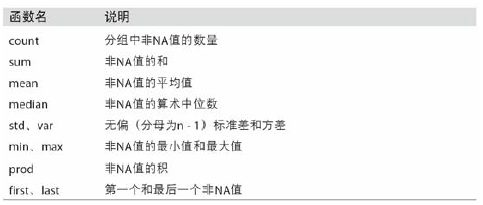

In [37]:
grouped = df.groupby('key1')

In [38]:
grouped['data1'].quantile(0.8) #计算样本分位数

key1
a    0.215582
b    0.279650
Name: data1, dtype: float64

In [39]:
#自定义函数
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [40]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.236225,1.007324
b,2.556722,1.650089


In [41]:
grouped.aggregate(peak_to_peak)

,data1,data2
key1,,
a,2.236225,1.007324
b,2.556722,1.650089


In [42]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.433270  1.134252 -1.441304 -1.047365 -0.653425  0.070748   
b      2.0 -0.487366  1.807875 -1.765727 -1.126547 -0.487366  0.151814   

               data2                                                   \
           max count      mean       std       min       25%      50%   
key1                                                                    
a     0.794921   3.0  1.064664  0.513528  0.618840  0.783915  0.94899   
b     0.790995   2.0  0.037650  1.166789 -0.787394 -0.374872  0.03765   

                          
           75%       max  
key1                      
a     1.287577  1.626164  
b     0.450173  0.862695

### 10.2.1面向列的多函数应用
* 对不同的列，使用不同的聚合函数。

In [43]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [44]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [45]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [46]:
grouped = tips.groupby(['day','smoker'])

In [47]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [48]:
#传入一组函数名，将得到一个DataFrame，其列以函数名命名
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

* 对于DataFrame，可以定义一组应用于全部列的一组函数；
或不同的列应用不同的函数

In [49]:

functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [50]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

* 对于不同的列，应用不同的函数。
* 方法是： 向agg传入一个从列名映射到函数的字典

In [51]:
#对每个列，应用不同的函数
grouped.agg({'tip':np.max,'size':'sum'})


tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [52]:
#对不同的列，应用不同组的函数
grouped.agg({'tip_pct':['min','max','mean','std'],
           'size':'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### 10.2.2以没有索引的形式返回聚合
向groupby传入as_index = False。
聚合数据的索引，关闭唯一分组健。

In [53]:
tips.groupby(['day','smoker'],as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 10.3apply：一般性的拆分-应用-合并
appy将待处理的对象拆分成多个片段，然后对各个片段调用传入的函数，最后在将各个片段组合到一起。
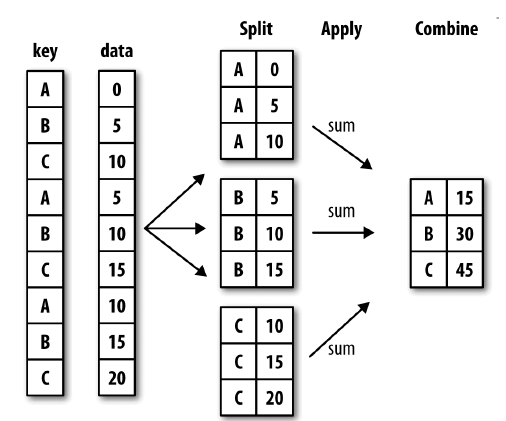

In [54]:
#apply函数调用的函数，没有限制，只需返回一个标量或者pandas对象。
def top(df,n=6,column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [55]:
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [56]:
tips.groupby('smoker').apply(top)  #调用自定义函数

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     6          8.77  2.00     No   Sun  Dinner     2  0.228050
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [58]:
#top函数的参数，作为apply函数的参数，放在函数名字后面，给出。
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

### 10.3.1 禁止分组健

In [59]:
#groupby函数中的参数group_keys = False /True
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
6,8.77,2.00,No,Sun,Dinner,2,0.228050
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733


### 10.3.2分位数和桶分析
根据指定的面元或样本分位数，将数据拆分成多块：cut或qcut。

In [60]:
#利用cut将随机数装入长度相等的桶。
frame = pd.DataFrame({'data1':np.random.randn(1000),
                     'data2':np.random.randn(1000)})
quartiles = pd.cut(frame.data1,4)

In [61]:
quartiles[:10]

0     (-0.256, 1.346]
1     (-0.256, 1.346]
2     (-0.256, 1.346]
3    (-1.858, -0.256]
4     (-0.256, 1.346]
5    (-1.858, -0.256]
6    (-1.858, -0.256]
7    (-1.858, -0.256]
8    (-1.858, -0.256]
9     (-0.256, 1.346]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.467, -1.858] < (-1.858, -0.256] < (-0.256, 1.346] < (1.346, 2.948]]

## 10.4 透视表和交叉表
### 10.4.1交叉表：crossrab
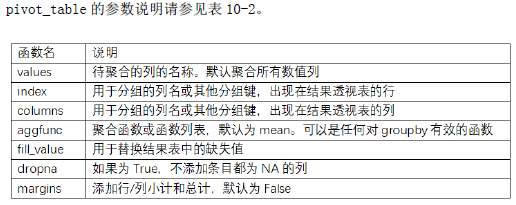

In [63]:
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [64]:
tips.pivot_table(['tip_pct','size'],index=['day','smoker'])

size   tip_pct
day  smoker                    
Fri  No      2.250000  0.151650
     Yes     2.066667  0.174783
Sat  No      2.555556  0.158048
     Yes     2.476190  0.147906
Sun  No      2.929825  0.160113
     Yes     2.578947  0.187250
Thur No      2.488889  0.160298
     Yes     2.352941  0.163863

In [65]:
tips.pivot_table(['tip_pct','size'],index=['day','smoker'],margins=True)

size   tip_pct
day  smoker                    
Fri  No      2.250000  0.151650
     Yes     2.066667  0.174783
Sat  No      2.555556  0.158048
     Yes     2.476190  0.147906
Sun  No      2.929825  0.160113
     Yes     2.578947  0.187250
Thur No      2.488889  0.160298
     Yes     2.352941  0.163863
All          2.569672  0.160803

In [66]:
tips.pivot_table(['tip_pct','size'],index=['day','smoker'],aggfunc=len,margins=True)

size  tip_pct
day  smoker               
Fri  No         4      4.0
     Yes       15     15.0
Sat  No        45     45.0
     Yes       42     42.0
Sun  No        57     57.0
     Yes       19     19.0
Thur No        45     45.0
     Yes       17     17.0
All           244    244.0

### 10.4.2交叉表：crosstab

In [68]:
pd.crosstab(tips.size,tips.tip_pct)

tip_pct,0.03563813585135547,0.05643340857787811,0.05679666792881484,0.05944673337257211,0.06565988181221273,0.06653359946773121,0.07180385288966724,0.07296137339055794,0.07358351729212656,0.07398273736128237,...,0.2526724975704568,0.2593144560357675,0.26348039215686275,0.2663115845539281,0.2795248078266946,0.2805351747949935,0.29198966408268734,0.32573289902280134,0.4166666666666667,0.710344827586207
row_0,,,,,,,,,,,,,,,,,,,,,
1708,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
